# 10_로지스틱 회귀 연습문제

로지스틱 회귀 분석을 수행하시오

weather.csv파일을 읽어서 Temp, Sunshine,  Humidity, Pressure, Cloud, RainToday , RainTomorrow 특성을 읽어서 dataframe으로 생성하고
RainTomorrow 변수(특성)을  로짓변환 (출력범위를 [0,1]로 조정) 합니다.

데이터를 train data 와 test data를 7:3 비율로 분리하여 
로지스틱 회귀분석을 수행하고, 모델의 정확도를 출력하고
Temp, Sunshine,  Umidity, Pressure, Cloud가 내일 비가 올것이라고 예보하는 영향도를 평가하시오


In [13]:
import pandas as pd
#1단계: 데이터 준비
df = pd.read_csv("./datas/weather.csv")
df
#print(df.info())

,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,2014-11-01,8.0,24.3,0.0,6.3,NW,30.0,NW,20,29,1015.0,7,23.6,No,Yes
1,2014-11-02,14.0,26.9,3.6,9.7,ENE,39.0,W,17,36,1008.4,3,25.7,Yes,Yes
2,2014-11-03,13.7,23.4,3.6,3.3,NW,85.0,NNE,6,69,1007.2,7,20.2,Yes,Yes
3,2014-11-04,13.3,15.5,39.8,9.1,NW,54.0,W,24,56,1007.0,7,14.1,Yes,Yes
4,2014-11-05,7.6,16.1,2.8,10.6,SSE,50.0,ESE,28,49,1018.5,7,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2015-10-28,9.0,30.7,0.0,12.1,NNW,76.0,NW,50,15,1010.8,3,30.0,No,No
362,2015-10-29,7.1,28.4,0.0,12.7,N,48.0,NNW,19,22,1016.9,1,28.2,No,No
363,2015-10-30,12.5,19.9,0.0,5.3,ESE,43.0,ENE,9,47,1022.8,2,18.3,No,No
364,2015-10-31,12.5,26.9,0.0,7.1,NW,46.0,WNW,28,39,1016.2,7,25.9,No,No


In [2]:
#문자열 데이터를 실수형 데이터로 변환
temp = df[['RainTomorrow']]
print(type(df['RainTomorrow']))
print(type(df['RainTomorrow'][0]))

<class 'pandas.core.series.Series'>
<class 'str'>


In [3]:
df['RainTomorrow'].replace('Yes', 1, inplace=True) 
df['RainTomorrow'].replace('No', 0, inplace=True) 

In [4]:
print(type(df['RainTomorrow'][0]))

<class 'numpy.int64'>


In [5]:
print(df.shape)
df=df.dropna(how='any')
print(df.shape)

(366, 15)
(359, 15)


In [6]:
# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split

X=df[['Temp', 'Sunshine' ,'Humidity','Pressure','Cloud']]   #독립변수 X 
Y=df['RainTomorrow']    #종속변수 Y : 연비


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10


In [8]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression 
logR = LogisticRegression() 
logR.fit(X_train, Y_train)   #학습


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
###########   ??????? ######
print('정확도: ' , logR.score(X_train, Y_train))
print('정확도: ' , logR.score(X_test, Y_test))

정확도:  0.8565737051792829
정확도:  0.9074074074074074


In [11]:
#Confusion Matrix기반 정확률, 지지율, F1계수, 재현율을 계산해서 보고서 반환
from sklearn.metrics import classification_report
y_predict = logR.predict(X_test)
print(classification_report(Y_test, y_predict ))   #실제 합격/불합격 테스트 데이터,  모형으로부터 예측된 합격/불합격 테스트 데이터 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        93
           1       0.86      0.40      0.55        15

    accuracy                           0.91       108
   macro avg       0.88      0.69      0.75       108
weighted avg       0.90      0.91      0.89       108



### 상관관계 분석

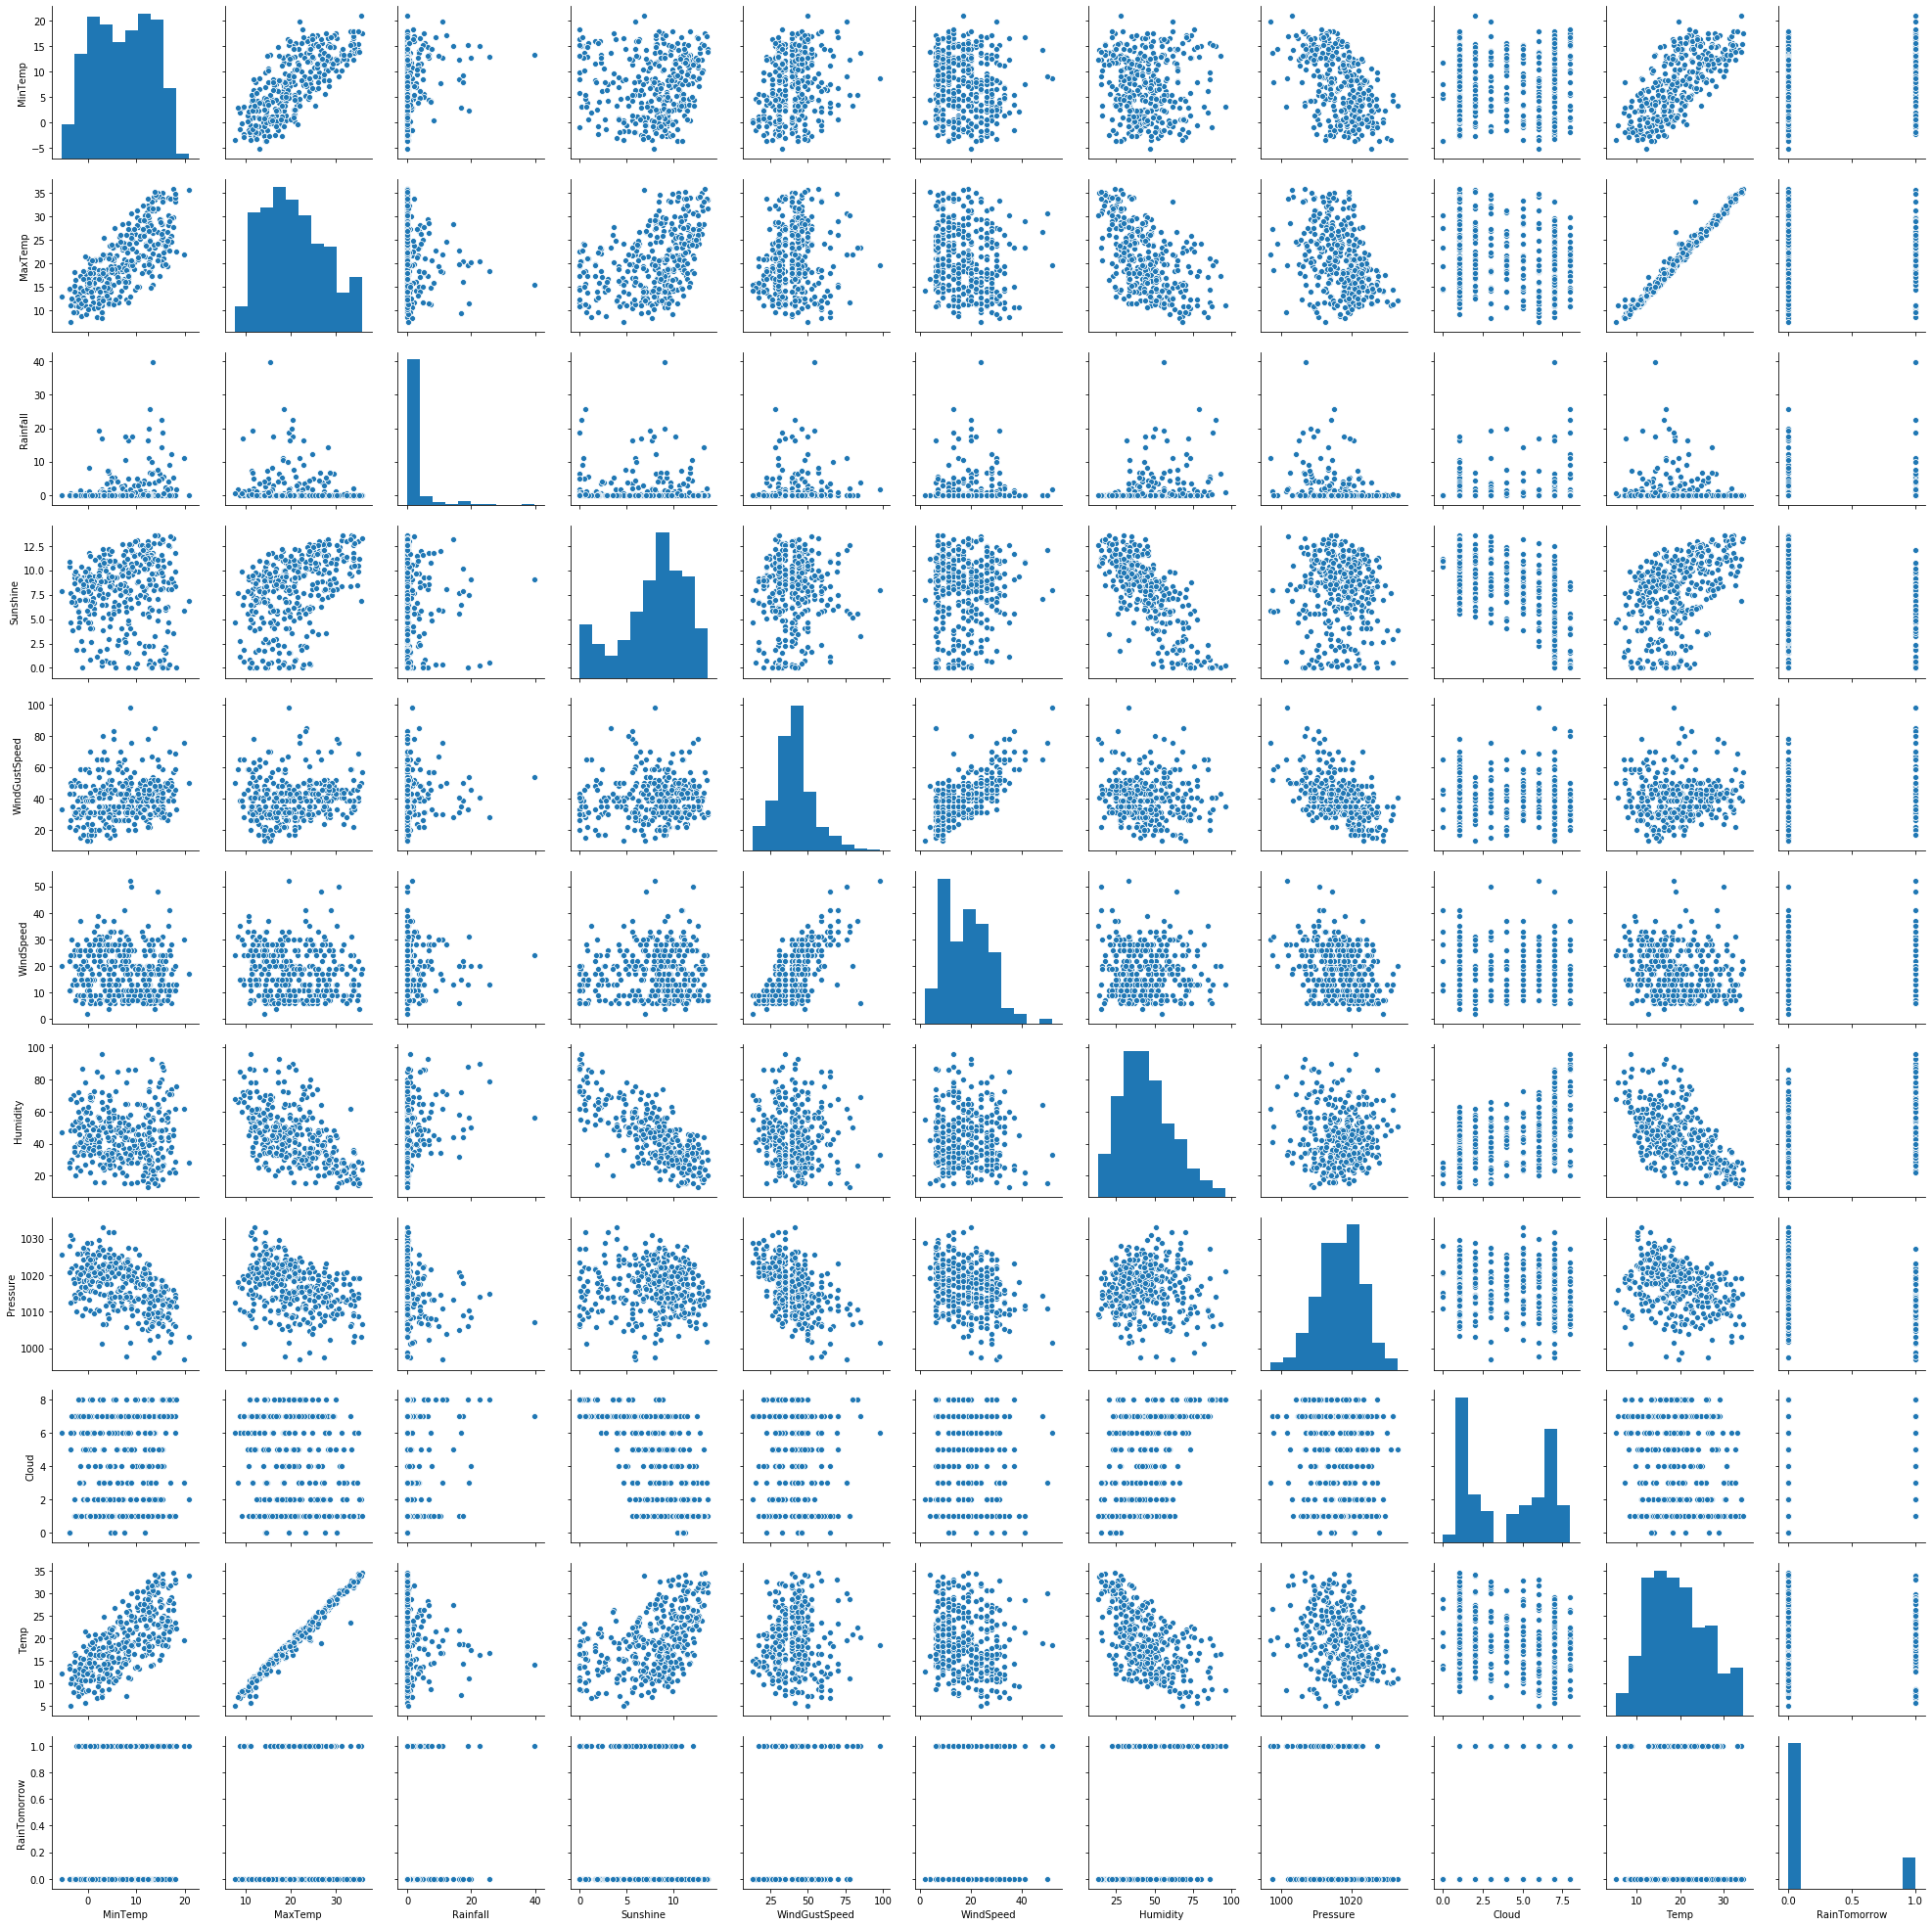

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()
plt.close()